# SAIL Amsterdam Weather Data Visualization
This notebook visualizes temperature, humidity, and rainfall data from August 20-24, 2025

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# Load the weather data
df = pd.read_csv('SAIL_Amsterdam_10min_Weather_2025-08-20_to_2025-08-24.csv')

# Convert DateTime column to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d %H:%M')

print(f"Data loaded: {len(df)} records from {df['DateTime'].min()} to {df['DateTime'].max()}")
df.head()

ValueError: time data "20250820 24:00" doesn't match format "%Y%m%d %H:%M", at position 132. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Graph saved as 'weather_data_graphs.png'


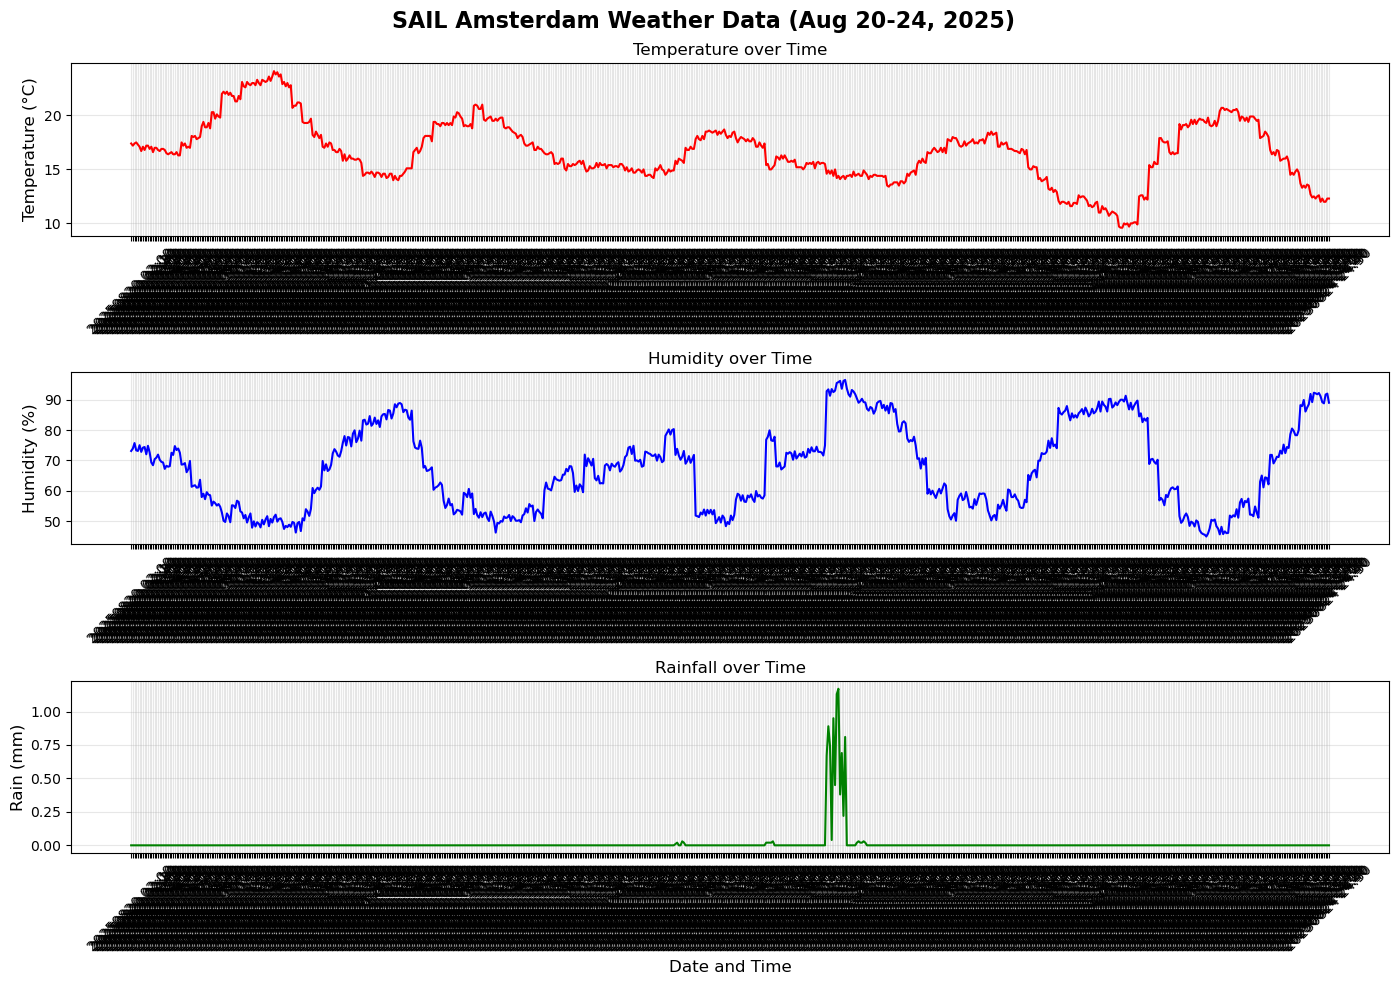

In [6]:
# Create figure with subplots for each weather parameter
fig, axes = plt.subplots(3, 1, figsize=(14, 10))
fig.suptitle('SAIL Amsterdam Weather Data (Aug 20-24, 2025)', fontsize=16, fontweight='bold')

# Plot 1: Temperature
axes[0].plot(df['DateTime'], df['Temperature_°C'], color='red', linewidth=1.5)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Temperature over Time')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Humidity
axes[1].plot(df['DateTime'], df['Humidity_%'], color='blue', linewidth=1.5)
axes[1].set_ylabel('Humidity (%)', fontsize=12)
axes[1].set_title('Humidity over Time')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Rain
axes[2].plot(df['DateTime'], df['Rain_mm'], color='green', linewidth=1.5)
axes[2].set_xlabel('Date and Time', fontsize=12)
axes[2].set_ylabel('Rain (mm)', fontsize=12)
axes[2].set_title('Rainfall over Time')
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('weather_data_graphs.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'weather_data_graphs.png'")

# Show the plot
plt.show()

In [7]:
# Summary statistics
print("=== Weather Data Summary ===")
print(f"\nTemperature (°C):")
print(f"  Min: {df['Temperature_°C'].min():.1f}°C")
print(f"  Max: {df['Temperature_°C'].max():.1f}°C")
print(f"  Mean: {df['Temperature_°C'].mean():.1f}°C")

print(f"\nHumidity (%):")
print(f"  Min: {df['Humidity_%'].min():.1f}%")
print(f"  Max: {df['Humidity_%'].max():.1f}%")
print(f"  Mean: {df['Humidity_%'].mean():.1f}%")

print(f"\nRainfall (mm):")
print(f"  Total: {df['Rain_mm'].sum():.2f} mm")
print(f"  Max (10-min): {df['Rain_mm'].max():.2f} mm")
print(f"  Rain events: {(df['Rain_mm'] > 0).sum()} (out of {len(df)} measurements)")

=== Weather Data Summary ===

Temperature (°C):
  Min: 9.6°C
  Max: 24.1°C
  Mean: 16.7°C

Humidity (%):
  Min: 44.9%
  Max: 96.5%
  Mean: 67.1%

Rainfall (mm):
  Total: 8.47 mm
  Max (10-min): 1.17 mm
  Rain events: 27 (out of 714 measurements)


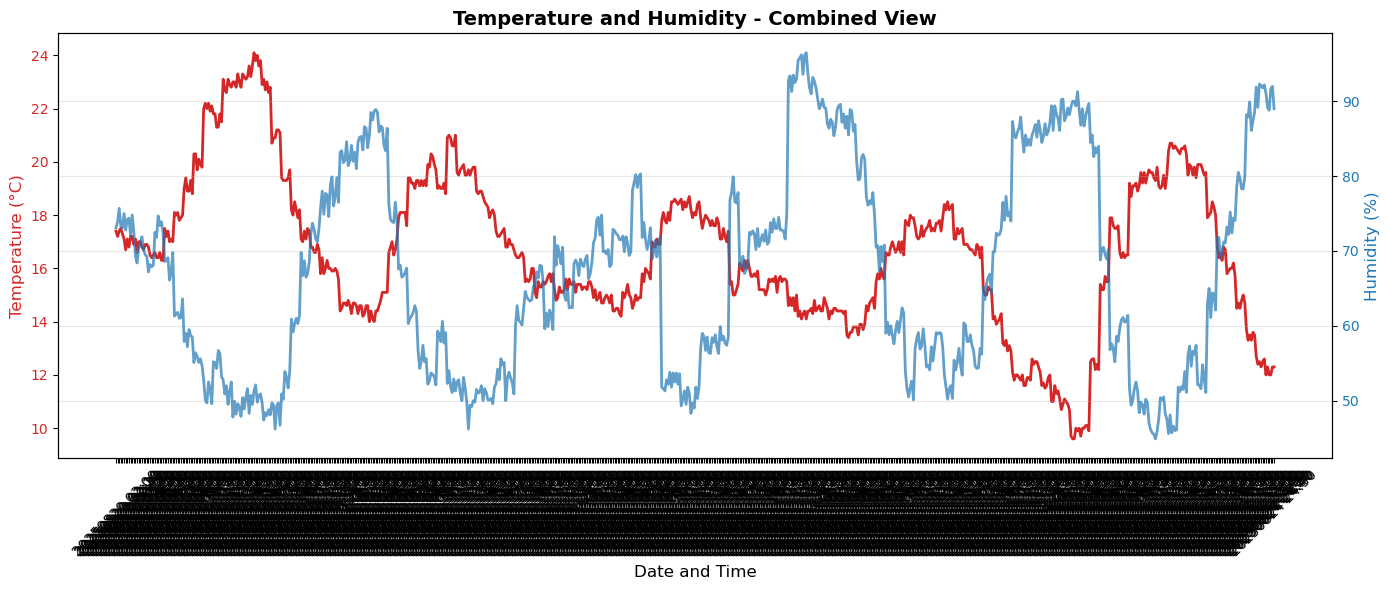

In [8]:
# Optional: Create a combined view on single plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature on left y-axis
color = 'tab:red'
ax1.set_xlabel('Date and Time', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(df['DateTime'], df['Temperature_°C'], color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Humidity on right y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color, fontsize=12)
ax2.plot(df['DateTime'], df['Humidity_%'], color=color, linewidth=2, alpha=0.7, label='Humidity')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Temperature and Humidity - Combined View', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()